In [1]:
#sklearn is a machine learning package, it has a few sample datasets in it, so we'll use it here
from sklearn import datasets
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

We'll load in one of the sample datasets from a package called scikitlearn. 
The loading part below, to get it into a dataframe is somethigng that you can just Google. 

In [2]:
tmp = datasets.load_boston()
df = pd.DataFrame(tmp['data'], columns=tmp.feature_names)
#df.head()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


We'll look at the number of rooms first...

In [3]:
df["RM"].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [4]:
df["RM"].value_counts().sort_index()

3.561    1
3.863    1
4.138    2
4.368    1
4.519    1
        ..
8.375    1
8.398    1
8.704    1
8.725    1
8.780    1
Name: RM, Length: 446, dtype: int64

This sucks to look at. There has to be a better way!!

In [5]:
#hist = thinkstats2.Hist(np.floor(df["RM"]), label='Rooms')
hist = thinkstats2.Hist(round(df["RM"],1), label='Rooms')
hist

Hist({5.9: 47, 6.0: 42, 6.2: 42, 6.4: 39, 6.1: 37, 6.3: 27, 6.5: 26, 6.6: 24, 5.8: 21, 5.6: 20, 5.7: 18, 6.8: 17, 7.0: 16, 6.7: 16, 6.9: 10, 5.4: 10, 7.2: 10, 7.1: 8, 5.5: 7, 5.0: 7, 7.3: 6, 5.3: 6, 7.8: 5, 7.4: 5, 7.5: 4, 8.3: 4, 4.9: 4, 7.9: 4, 5.2: 2, 7.7: 2, 4.1: 2, 8.7: 2, 7.6: 2, 8.4: 2, 8.0: 2, 4.5: 1, 8.2: 1, 8.1: 1, 4.6: 1, 4.7: 1, 8.8: 1, 4.4: 1, 3.9: 1, 3.6: 1, 5.1: 1}, 'Rooms')

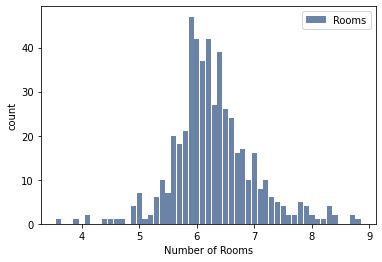

In [6]:
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of Rooms', ylabel='count')

In [7]:
#Variance
df["RM"].var()

0.4936708502211095

In [8]:
#Standard deviation 
df["RM"].std()

0.7026171434153237

Are homes by the river bigger?

First, we can take a look at how the two different sets of houses (river vs no river) are distributed.

In [9]:
river = df[df["CHAS"]==1]
noRiver = df[df["CHAS"] != 1]

In [10]:
riverHist = thinkstats2.Hist(np.floor(river["RM"]), label="Riverside")
landHist = thinkstats2.Hist(np.floor(noRiver["RM"]), label="Landlocked")

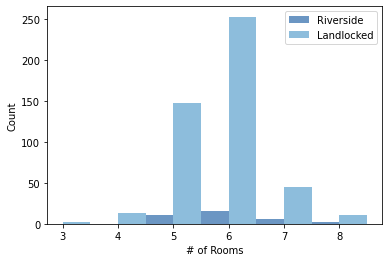

In [16]:
width = 0.5
thinkplot.PrePlot(2)
thinkplot.Hist(riverHist, align='right', width=width)
thinkplot.Hist(landHist, align='left', width=width)
thinkplot.Config(xlabel='# of Rooms', ylabel='Count')

What can we gather from this?

In [12]:
print(river["RM"].describe())
print(noRiver["RM"].describe())

count    35.000000
mean      6.519600
std       0.876416
min       5.012000
25%       5.935500
50%       6.250000
75%       6.915000
max       8.780000
Name: RM, dtype: float64
count    471.000000
mean       6.267174
std        0.685895
min        3.561000
25%        5.882000
50%        6.202000
75%        6.594000
max        8.725000
Name: RM, dtype: float64


In [13]:
river["RM"].mean() - noRiver["RM"].mean()

0.2524259023354505

In [14]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [15]:
CohenEffectSize(river["RM"], noRiver["RM"])

0.3602262108444541